# Part 0 - Introduction to Qiskit

by **Francesco Tacchino** 

<p style='text-align: justify;'> In this chapter, you will learn how to import the qiskit library in a python script, how to load your credentials and check that you are ready to go. We will cover a theoretical minumum of qiskit functionalities that will be sufficient to run simple quantum circuits on classical simulators and real cloud-based quantum processors. For more extensive discussions and advanced usage, you can have a look to the official qiskit documentation and tutorials on <https://qiskit.org>. </p>

<p style='text-align: justify;'> If you are not very familiar with quantum computing routines, you can read section 0.1 here to set up your qiskit, then move directly to [Part 1](./Part1.ipynb) to work on the basics. You may want to come back to this notebook later to learn about qiskit functionalities. </p>

## 0.1 - Setting up qiskit

### Importing qiskit

<p style='text-align: justify;'> You can import qiskit in a python script as you would do with any other module. In this example, we will also import a Qconfig file where our API key and url for the IBM Quantum Experience are saved. The following code does the imports and checks the current version of qiskit. </p>

In [ ]:
# Welcome to qiskit
import qiskit as qk
import Qconfig

myvers = qk.__version__
print("You are using qiskit version", myvers)


### Credentials

<p style='text-align: justify;'> There are several ways of loading the IBMQ credentials allowing you to authenticate to the Quantum Experience. Authentication will give you access to the remote services provided by IBMQ, including the real quantum processors. Before proceeding, go to the Quantum Experience website (https://quantumexperience.ng.bluemix.net/qx/experience), sign up and obtain an API key. Then fill the Qconfig template coming with the present set of tutorials. If your Qconfig is correctly configured, you can run the following to load your credentials for a one-time use. Other methods permanetly save credentials on your machine for future reference without the need of a Qconfig file (see the online Qiskit tutorial or documentation for these advanced options). Notice that running the following code twice on the same kernel (without restarting it) in Jupyter may cause a warning message ('Credentials are already in use.'). </p>

In [ ]:
# Set up your credentials for the IBM-Q experience in one-time mode (easiest)

qk.IBMQ.enable_account(Qconfig.APItoken, **Qconfig.config)

### The local backends

<p style='text-align: justify;'> Local backends are simulation engines for your quantum software running locally on your machine. Of course, they are at best classical emulators of a real quantum processor, but they are very versatile, quick and useful to test your codes and algorithms on small numbers of qubits. You can visualize which of these engines are available by running the following command: </p>

In [ ]:
# Check the available local backends

qk.BasicAer.backends()

<p style='text-align: justify;'> The `BasicAer` sub-module stands for a simplified versioon of Aer provider. Aer is the part of qiskit dealing with simulation of quantum processors on classical machines. It gives you access to the following backends, that you should see among those listed in the output of the command above:</p>

* <p style='text-align: justify;'>`qasm_simulator`: this is the most important local simulator, which allows you to directly run any quantum circuit as if you were working with an ideal quantum processor and get the outcomes in the same form as you would get with real backends. Advaced users can also include and control the noise affecting the computation.</p>
* <p style='text-align: justify;'>`statevector_simulator`: this simulator can be used to compute the final state of the qubits (i.e. a $2^N$-dimensional vector for $N$ qubits) at the end of a quantum circuit. </p>
* <p style='text-align: justify;'>`unitary simulator`: this simulator works out the algebra of the unitary matrices representing the operations in a quantum circuit. </p>

<p style='text-align: justify;'> In this tutorials, we will mainly use the `qasm_simulator` and the `statevector_simulator`. Once again, you can learn more about advanced features in the official qiskit tutorials. </p>

### The IBMQ backends

<p style='text-align: justify;'> The `IBMQ` provider stands for the remote IBM Quantum Experience giving you access to real quantum processors. In order to successfully use such backends, you will need to load your credentials (one method was explained in a paragraph above), containing a personal API key connected with your account. Once authenticated, run the following command to check the available remote IBMQ backends:</p>

In [ ]:
# Check the available cloud-based backends

qk.IBMQ.backends()

<p style='text-align: justify;'> In the output, you should get a list of backends whose names start with 'ibmq'. Most of them are real quantum processors:</p>

* <p style='text-align: justify;'> `ibmqx4`: the 'Tenerife' 5-qubit quantum chip </p>
* <p style='text-align: justify;'> `ibmq_16_melbourne`: the 14-qubit quantum chip </p>

<p style='text-align: justify;'> Through the quantum experience you have also access to a hpc simulator, named `ibmq_qasm_simulator`: it is essentially a remote version of the local `qasm_simulator` but with extended computational power, allowing simulations of circuits containing up to 32 qubits. Remember, however, that this is not a real quantum processor!</p>

## 0.2 - Writing and running quantum code

### A quantum program

<p style='text-align: justify;'> Programming a sequence of gates and measurements (i.e. a quantum circuit) in qiskit can be done in a few easy steps. First of all, we have to declare how many qubits (a _quantum register_) we want to use, and how many classical bits (a _classical register_) we will need to write the outcome of the quantum measurements at the end of the circuit. For a simple example, we will use 2 qubits and 2 bits:</p>

In [ ]:
qr = qk.QuantumRegister(2,name='qreg')
cr = qk.ClassicalRegister(2,name='creg')
qc = qk.QuantumCircuit(qr,cr)  # A QuantumCircuit is composed of quantum and classical registers

<p style='text-align: justify;'> Naming the registers is optional, but can be useful in some cases (we will see an example below). The `QuantumCircuit` object contains all the tools required to manipulate and build your sequences and instructions. The most important feature is of course the possibility to add quantum gates acting on specific qubits. For example, let us add a single qubit $\mathrm{NOT}$ (named $\mathrm{X}$ in the context of quantum computing) gate to the first qubit in our register `qr` included in circuit `qc`: </p>

In [ ]:
qc.x(qr[0])

<p style='text-align: justify;'> When writing sequences of gates, you can use normal python commands such as `for` cycles to add multiple gates. For example, let us add Hadamard gates on both qubits in `qr`:</p>

In [ ]:
for indx in range(2):
    qc.h(qr[indx])

<p style='text-align: justify;'> Remember that in qiskit all the qubits are conventionally initialized in the blank state $\left|0\right\rangle$ at the beginning of a circuit. You sould also pay attention that, as it is common in python, the register indeces start at 0 (i.e. the first qubit of `qr` is `qr[0]`). </p>
  
<p style='text-align: justify;'> Qiskit can handle a large set of single qubit gates: you can see all the options and the syntax in the official qiskit tutorials, and many examples will be also shown in the remaining of these notes. The native two qubit gate completing a universal set for quantum computation is the $\mathrm{CX}$ (known also as $\mathrm{CNOT}$) gate. The syntax is the following:</p>

In [ ]:
qc.cx(qr[0],qr[1]) # The first entry is the control qubit, the secon entry is the target qubit for the CNOT

<p style='text-align: justify;'> At the end of your cicruit, you may want to measure some (or all) of your qubits. Qiskit provides a measurement in the standard computational basis (i.e. the set of eigenstates of the Pauli matrix $\sigma_z$ for each qubit). Later in these notes, we will learn how to select a different basis for your measurements. When including a measurement in the circuit, you can choose the classical bit to which each qubit will be mapped:</p>

In [ ]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

<p style='text-align: justify;'> Now that the circuit is complete, you can visualize it directly in qiskit. Notice that the registers will be labeled with the optional names we selected at the beginning:</p>

In [ ]:
qc.draw()

<p style='text-align: justify;'> You can also ask for a matplotlib or latex rendering style:</p>

In [ ]:
qc.draw(output='mpl')

In [ ]:
qc.draw(output='latex')

### Running the program locally

<p style='text-align: justify;'> To run a quantum program, we need first to select a backend. Let us start with the local simulator:</p>

In [ ]:
backend1 = qk.BasicAer.get_backend('qasm_simulator')

<p style='text-align: justify;'> We can then directly ask qiskit to execute our circuit:</p>

In [ ]:
job1 = qk.execute(qc, backend1, shots=1024) # The shots are the number of times the circuit will be run.
                                            # More shots will mean better reconstruction of the measurement statistics
                                            # but also longer execution times and (on real backends) more execution
                                            # credits consumed

<p style='text-align: justify;'> After the command above has completed its execution, we can ask for the results in the following way:</p>

In [ ]:
result1 = job1.result()
counts1 = result1.get_counts(qc)
print(counts1)

<p style='text-align: justify;'> Notice that the rightmost bit in the output (e.g. the 0 in '10') represents `cr[0]` and the index of `cr` bits increases towards the left. Remember that the results are probabilistic, so running this notebook twice could give slightly different counts. We can also make a nice histogram of the results:</p>

In [ ]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts1)

### Running on IBMQ real backends

<p style='text-align: justify;'> Running your quantum code on a remote real quantum processor requires very little modifications from what we have already done. In particular, there are no changes at all in how to prepare and write the `qc` object. We just need to select one of the available remote IBMQ chips as our backend:</p>

In [ ]:
backend2 = qk.IBMQ.get_backend('ibmqx4')

<p style='text-align: justify;'> We can then ask again qiskit to run our circuit, this time on the 'Tenerfe' processor. If the number of qubits in `qr` can fit into the real chip (as it is the case now), qiskit will automatically take care of selecting the right qubits on which the circuit will be mapped and to adjust the topology of the $\mathrm{CX}$ gates if that is needed (more on this in a moment). The execution now will last longer because we will have to wait in the job queue of the public device. You can submit as many jobs as your execution credits allow (see Appendix to learn how to get the status of your credits and the cost of single executions).</p>

In [ ]:
job2 = qk.execute(qc, backend=backend2, shots=1024)

<p style='text-align: justify;'> The command above will actually onlu submit your request to the IBMQ server. The job will then stay in the queue and it will eventually be executed. You can get real time updates on the status of your job by using the following command:</p>

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job2, interval=5)

<p style='text-align: justify;'> The previous command will put your python script on hold, with the above output being updated every `interval` until the job is executed. A non-blocking version of `job_monitor` is also available, see https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/jupyter/jupyter_backend_tools.ipynb </p>

<p style='text-align: justify;'> Once the execution is complete, you can retrieve the results as done above for the local version:</p>

In [ ]:
result2 = job2.result()
counts2 = result2.get_counts(qc)
print(counts2)
plot_histogram(counts2)

<p style='text-align: justify;'> Every job you submit to the IBM Quantum Experience gets a unique ID that you can read and save for future reference:</p>

In [ ]:
jobID = job2.job_id()
print(jobID)

<p style='text-align: justify;'> For example, with the `jobID` you can retrieve your job from the server, and extract the results (this is particularly useful if the execution queue takes longer than you can wait online):</p>

In [ ]:
job_get = backend2.retrieve_job(jobID)
counts_get = job_get.result().get_counts()
print(counts_get)

<p style='text-align: justify;'> We can use the hystogram plotting function to compare the ideal (local simulator) and experimental results:</p>

In [ ]:
plot_histogram([counts1,counts_get])

#### _Bonus track_ - Choosing the layout on real backends

<p style='text-align: justify;'> This subsection is rather technical and you can skip it if you are not immediately interested. You may come here later if you want to learn more about how to map your quantum circuits to specific sets of qubits on the real devices.</p>

<p style='text-align: justify;'> When running a quantum circuit on IBMQ real backends, you should always keep in mind the fact that these prototypes are not ideal, in the sense that they are noisy, the qubits are not all identical and the connectivity between qubits is not _all-to-all_. In particular, whenever your circuit contains two-qubit $\mathrm{CX}$ gates, it is not always possible to run it on the selected backend as it stands, since the two qubits involved may not be directly connected and/or the role of control and target is not interchangeable. Qiskit is able to deal with most of these issues related to mapping an abstract circuit to the real processor in an automated way, but you should be aware that this can result in a modified version of the circuit being actually run on the chip. This modified circuit is usually longer than the original one, and therefore affected by larger amounts of noise and errors, leading to worse performances. Sometimes, the qiskit mapper may also fail. </p>

<p style='text-align: justify;'> Whenever possible and particularly to optimize specific applications, you should always try to consider the structure of the backend already when designig the quantum circuit. You might also want to select a specifig group of the available qubits to run your quantum code. In all these cases, qiskit lets you specify your preferred mapping of a circuit to the physical qubits with a layout option. For example, let us suppose we want to run our `qc` circuit on 'Tenerife' mapping qubits 0 and 1 of our abstract quantum register `qr` with name `qreg` to qubits 3 and 4 of the chip. Notice that a $\mathrm{CX}(q_3,q_4)$ with qubit 3 acting as control and qubit 4 as target is directly available on the processor (see https://github.com/Qiskit/ibmq-device-information for details on the real backends, and the official qiskit tutorials for more information on how to extract backend properties directly inside a python script). First, we specify the layout with the following syntax involving register names (`q` is a standard name on the real devices):</p>

In [ ]:
custom_layout = {("qreg", 0): ("q", 3), ("qreg", 1): ("q", 4)} # abstract qr[0] will be mapped in q[3] on Tenerife
                                                               # abstract qr[1] will be mapped in q[4] on Tenerife

<p style='text-align: justify;'> Then, we tell qiskit to compile our circuit for the required backend by using our initial layout as a starting point. If the `custom_layout` lets the circuit be mapped as it is on the chip (i.e. if all the two qubit gates are connected and directed in the right way when, for example, qubits 3 and 4 on the chip represent qubits 0 and 1 of the abstract circuits), the original circuit will not be modified nor made longer, but mapped and run directly on the real backend as we wanted it originally.</p>

In [ ]:
backend_coupling_map = backend2.configuration().coupling_map
qobj = qk.compile(qc, backend = backend2 , coupling_map = backend_coupling_map, initial_layout = custom_layout, 
                  shots = 1024)

<p style='text-align: justify;'> We can then run the compiled quantum object `qobj` with the following command:</p>

In [ ]:
job3 = backend2.run(compiled_qobj)

<p style='text-align: justify;'> The `job3` object is now equivalent to `job2` above, and can be treated in the same way for monitoring status and retrieving results. In order to appreciate the difference between a better and a worse choice of the layout, below we compare the  _QASM_ listings of two quantum objects with the same circuit `qc` but different mappings. Here _QASM_ stands for [_quantum assembly language_](https://arxiv.org/abs/1707.03429), and is used to describe the sequence of gates that is _actually_ run on the chip after the compilation stage through qiskit has taken place.</p>

In [ ]:
from qiskit.qobj._converter import qobj_to_dict_previous_version   # This is a workaround to access the compiled QASM

custom_layout_bad = {("qreg", 0): ("q", 2), ("qreg", 1): ("q", 3)} # There is only a 3 -> 2 direction of CX on Tenerife
                                                                   # so qiskit will add additional gates to reverse the
                                                                   # 0 -> 1 CX that we requested in qc.
qobj_bad = qk.compile(qc, backend = backend2 , coupling_map = backend_coupling_map, initial_layout = custom_layout_bad, 
                      shots = 1024)

qobj_old = qobj_to_dict_previous_version(qobj)
QASMcompiled = qobj_old['circuits'][0]['compiled_circuit_qasm']
print('Here is the compiled QASM source code for the good mapping:')
print(QASMcompiled)

qobj_bad_old = qobj_to_dict_previous_version(qobj_bad)
QASMcompiled_bad = qobj_bad_old['circuits'][0]['compiled_circuit_qasm']
print('Here is the compiled QASM source code for the bad mapping:')
print(QASMcompiled_bad)

<p style='text-align: justify;'> The compiled circuit in the second case is formally equivalent to the original one, in the sense that the overall unitary transformation is the same, but the structure is changed, and the circuit is longer (there are 3 single qubit gates instead of only 2, and the cx is in the 3->2 direction, the only available on the hardware, even though we asked for 0->1 in the abstract `qc`, and mapped qr[0] on Tenerife's q[2] and qr[1] on Tenerife's q[3]). Notice that in both cases, single qubit gates are translated in some general parametrized unitaries (`u2`, `u3`), which are the native single-qubit gates on the IBMQ chips.</p>

## Exercises

* <p style='text-align: justify;'> **Exercise 0.1** Run again this notebook (after restarting the Jupyter kernel!) without enabling your credentials. How do the available local and IBMQ backends change?</p>
* <p style='text-align: justify;'> **Exercise 0.2** Run an experiment, either on local or on remote backends, with the following circuit:</p>
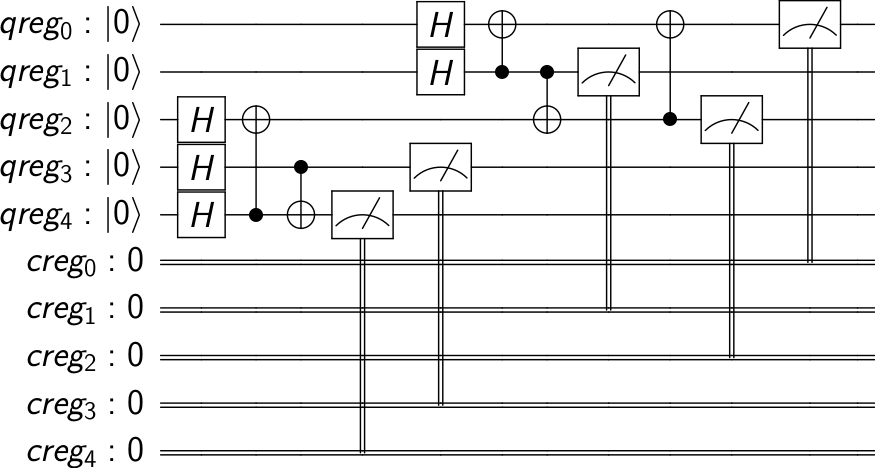
* <p style='text-align: justify;'> **Exercise 0.3** Run an experiment, either on local or on remote backends, implementing the following unitary transformation on two qubits $q_0$ and $q_1$ starting from the blank state $|00\rangle$:
$$ U = \mathrm{X}_{q_0} \, \mathrm{CX}(q_0,q_1) \, \mathrm{H}_{q_0} $$ (_hint_: pay attention to the order in which the gates appear in the formula with respect to the order of gates in the circuit).</p>

## Appendix: the credits system

<p style='text-align: justify;'> The IBM Quantum Experience uses a credits system to manage execution queues. With a standard account you will get a fixed amount of credits which you can use to submit a job to be run on a real chip. Each execution will cost from 3 to 5 credits, depending on the amount of shots (max. 8192, costing 5 credits). You can submit jobs as long as you have credits available, and each time one of your jobs gets executed you will receive back the credits you spent on it. To know the status of your credits, you can check your personal page on the IBMQ website, or use the IBM Quantum Experience API from python. Notice that you may need to install the python package `IBMQuantumExperience` by running e.g. `pip install IBMQuantumExperience` from your command line.</p>

In [ ]:
from IBMQuantumExperience import IBMQuantumExperience
api = IBMQuantumExperience(Qconfig.APItoken, config={'url':Qconfig.config["url"]}, verify=True)
api.get_my_credits()

<p style='text-align: justify;'> You will see the maximum amount of credits that are associated to your account under the key `maxUserType` and the credits that are available at the moment with the label `remaining`.</p>